In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convert(s): 
  # The function that converts the string to float
  s = s.strip().replace(',', '.')
  return float(s)

In [3]:
import csv

with open("mass_AA.csv" ) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',' )
    t_values, x_values, y_values = [], [],[]
    for row in readCSV:
        tt  =  convert(row[0])
        xx  =  convert(row[1])
        yy  =  convert(row[2])
        t_values.append(tt)
        x_values.append(xx)
        y_values.append(yy)

In [4]:
len(x_values)

6222

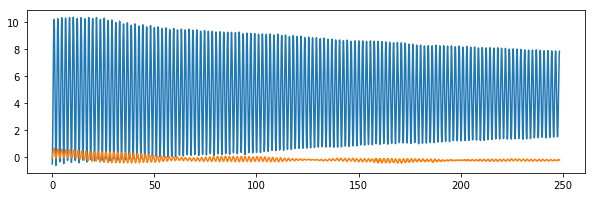

In [5]:
plt.figure(figsize = (10,3))
plt.plot(t_values,y_values)
plt.plot(t_values,x_values)
plt.show()

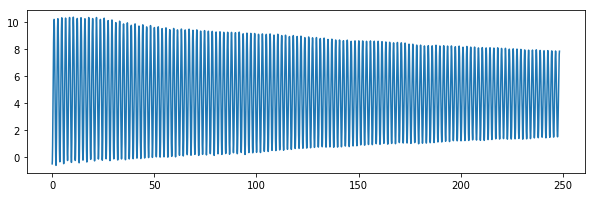

In [6]:
plt.figure(figsize = (10,3))
plt.plot(t_values,y_values)
plt.show()

## Calculo de la envolvente de máximos locales

In [17]:
ndat= len(y_values)
# Es conveniente centrar los datos en la media  
y_val = np.array(y_values) - np.mean(y_values)
t_val = np.array(t_values) 

6222

In [8]:
from scipy.signal import argrelextrema
argrelextrema(y_val, np.greater)

(array([  23,   70,  118,  164,  213,  259,  307,  354,  402,  448,  496,
         543,  591,  638,  686,  733,  780,  827,  875,  922,  969, 1016,
        1064, 1111, 1159, 1206, 1253, 1300, 1348, 1395, 1442, 1490, 1537,
        1584, 1631, 1679, 1726, 1774, 1821, 1868, 1915, 1963, 2010, 2057,
        2104, 2152, 2199, 2247, 2294, 2341, 2388, 2436, 2483, 2531, 2578,
        2625, 2672, 2720, 2767, 2814, 2862, 2909, 2956, 3004, 3051, 3098,
        3146, 3193, 3240, 3288, 3335, 3382, 3430, 3477, 3524, 3572, 3619,
        3666, 3714, 3761, 3808, 3855, 3903, 3950, 3997, 4044, 4092, 4139,
        4187, 4234, 4281, 4328, 4376, 4423, 4470, 4518, 4565, 4612, 4660,
        4707, 4754, 4802, 4849, 4896, 4943, 4991, 5038, 5085, 5133, 5180,
        5227, 5275, 5322, 5369, 5417, 5464, 5511, 5558, 5606, 5653, 5700,
        5747, 5795, 5843, 5890, 5937, 5984, 6031, 6079, 6127, 6173]),)

In [9]:
indx = argrelextrema(y_val, np.greater)[0]
y_maxLoc = y_val[indx]
t_maxLoc = t_val[indx]

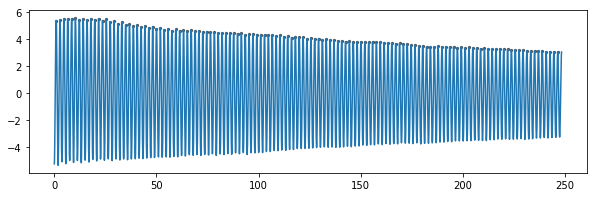

In [10]:
plt.figure(figsize = (10,3))
plt.plot(t_values,y_val)
plt.scatter(t_maxLoc,y_maxLoc, color='black', s = 5.25, alpha = 0.55)
plt.show()

## Análisis de oscilaciones

In [11]:
# framerate es el número de onservaciones por unidad de tiempo
framerate = ndat/np.max(t_values)
d = 1/framerate

In [12]:
Y_V = np.fft.rfft(y_val)
frec = np.fft.rfftfreq(ndat, d)
# Se recuperan los datos originales mediante la transformada inversa de Fourier real
datOrg =   np.fft.irfft(Y_V) 

In [13]:
psd = np.abs(Y_V)**2 + np.abs(Y_V)**2
ind = psd[:]>0.1e6
frec_pr = frec[ind]

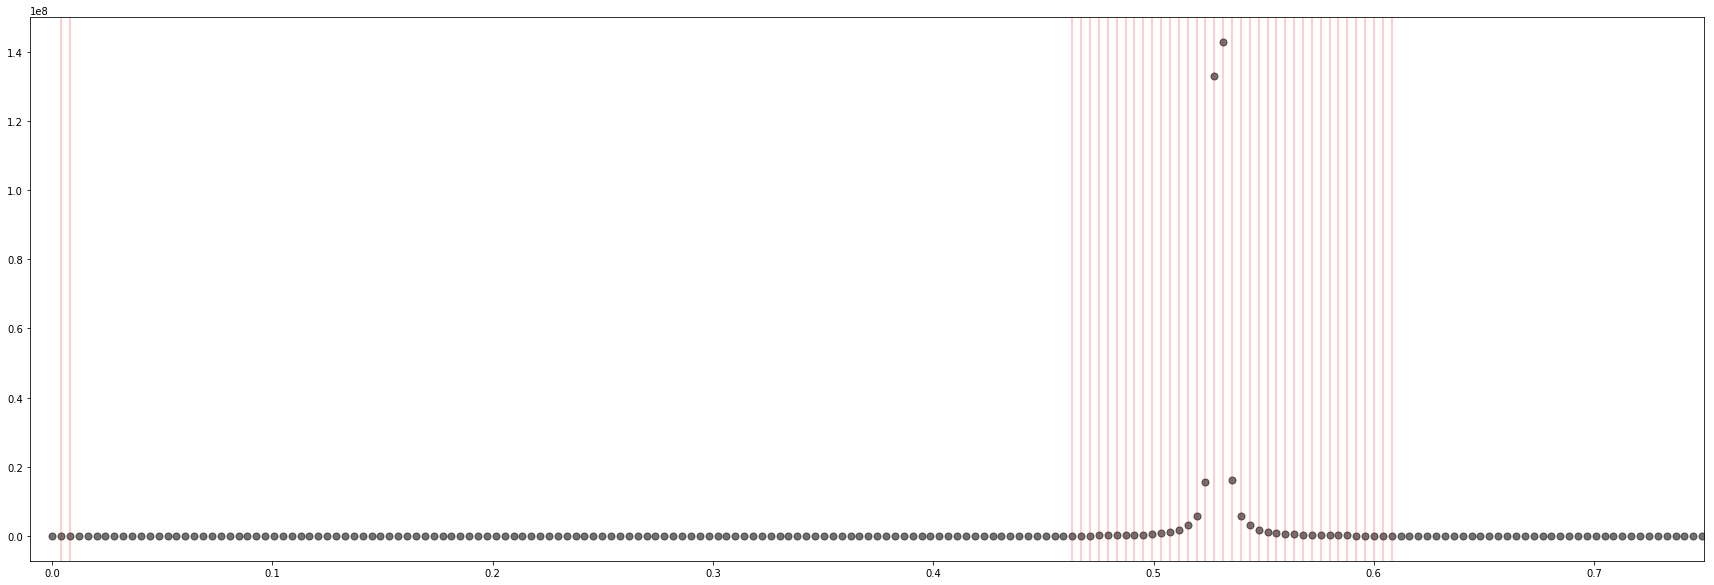

In [14]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
for i in range(len(frec_pr)):
    ax.axvline(frec_pr[i],color='red',alpha = 0.25 )
ax.set_xlim([-0.01, 0.75])
ax.scatter(frec,psd,color='black', s = 50.25, alpha = 0.55)
plt.show()

In [15]:
Y = Y_V
Y[~ind] = 0+0j
filtrado = np.fft.irfft(Y)
nt_val = t_val[0:ndat-1]

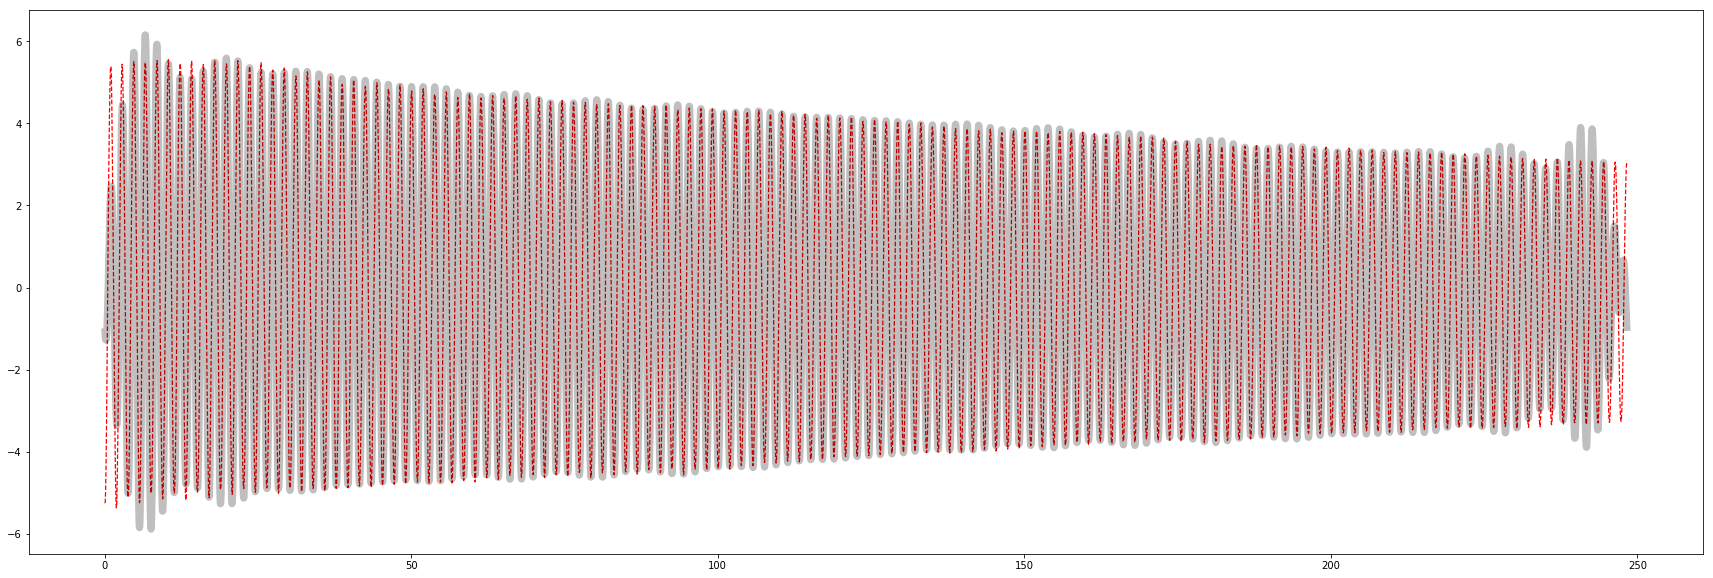

In [16]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
#ax.plot(t_val,np.fft.irfft(Y_V),'r,' )
#ax.scatter(t_val,y_val,color='black', s = 5, alpha = 0.35)
ax.plot(t_val, datOrg, 'r--', lw = 1.25)
ax.plot(t_val, filtrado, 'k', lw = 7.25, alpha = 0.25)
plt.show()